In [167]:
import os
import datetime as dt
import pandas as pd
from matplotlib import pylab as plt
from sklearn.linear_model import LinearRegression

In [168]:
df = pd.read_csv("timeseries/external.csv", sep=",", index_col="date")
df = df.drop("Unnamed: 0", axis=1)
df.index.names = ["Date"]
df

,PriceUSD,HashRate
Date,,
2015-01-02,315.942732,3.333450e+05
2015-01-03,285.647310,3.272842e+05
2015-01-04,263.334575,3.474869e+05
2015-01-05,275.003852,3.151626e+05
2015-01-06,287.549521,3.192031e+05
...,...,...
2017-06-26,2426.365051,5.023770e+06
2017-06-27,2530.345536,4.634604e+06
2017-06-28,2562.792264,5.554450e+06


<Axes: xlabel='Date'>

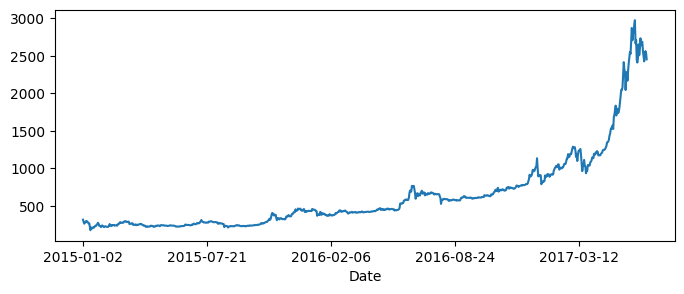

In [169]:
df.PriceUSD.plot(figsize=(8, 3))

<Axes: xlabel='Date'>

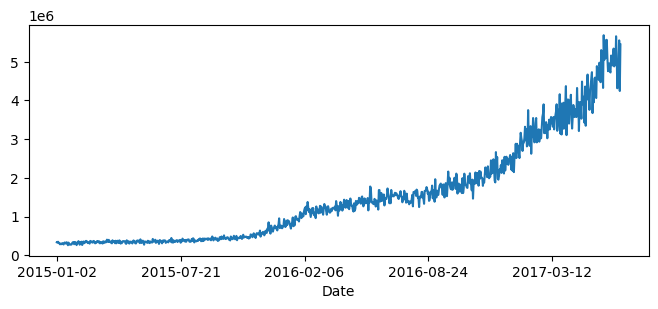

In [170]:
df.HashRate.plot(figsize=(8, 3))

In [171]:
# Printing correlations between variables
df.corr()

,PriceUSD,HashRate
PriceUSD,1.000000,0.937447
HashRate,0.937447,1.000000


In [172]:
df = df.reset_index()
df["Date"] = pd.to_datetime(df["Date"]).map(dt.datetime.toordinal)

y = 1.5963403784515047 * x + -1174364.2202138337


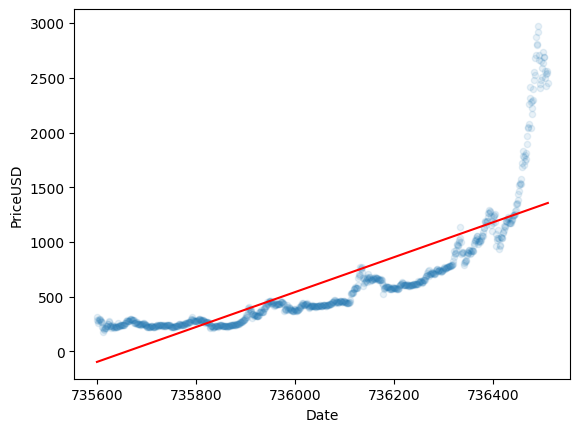

In [173]:
# Creating a Linear Regression model on our data
lin1 = LinearRegression()
lin1.fit(df[["Date"]], df["PriceUSD"])

# Creating a plot
ax = df.plot.scatter(x="Date", y="PriceUSD", alpha=.1)
ax.plot(df["Date"], lin1.predict(df[["Date"]]), c='r')

# Printing linear function from our regression
print("y = " + str(lin.coef_[0]) + " * x + " + str(lin.intercept_))